## Home assignement

### Time series data visualization

**Task**: to depict the overall pricing behaviour of retailers (not grouped, see [Requested results 2]()) in various categories and produce conditional descriptive statistics for meaningful interpretation of for
instance the price dispersion and trajectories. <br>
```
What can be said of the price dispersion in these categories, and are there other notable trends?
```
*Hint: visually present the descriptive statistics using the ggplot2 package in R*

In [1]:
install.packages("data.table")
install.packages("psych")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
library(data.table)

In [2]:
# LOAD DATA ################################################
# creating a dataframe from the pricing dataset
#data_pricing <- read.csv("home_assignment_data_pricing.csv")

data_pricing <- fread("home_assignment_data_pricing.csv")

## Explore the dataframe

In [5]:
# EXPLORE DATA ################################################
# Using head or tail to look at part of it, 6 first lines by default
# here the first 3 lines

head(data_pricing,3)

product_id,date,category,price,weekday,week,store_id,year,month_numerical,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1030146,2013-01-30,Cellphones,1195,Wednesday,5,6852,2013,1,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,11909,2013,1,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,16724,2013,1,1224.607,7.110375,3,4464,67


In [32]:
# Check the dimension, nrow x ncol
dim(data_pricing)

[1] 1110820      14

In [35]:
# Let's look for missing values, if any
colSums(is.na(data_pricing))

product_id                                date 
                                  0                                   0 
                           category                               price 
                                  0                                   0 
                            weekday                                week 
                                  0                                   0 
                           store_id                                year 
                                  0                                   0 
                    month_numerical                  cpi_adjusted_price 
                                  0                                   0 
          log_of_cpi_adjusted_price number_of_store_per_product_and_day 
                                  0                                   0 
             total_days_for_product          total_products_in_category 
                                  0                                   0

In [7]:
# EXAMINE RESULTS ##########################################
# Check datatype of dataframe columns
str(data_pricing)

Classes ‘data.table’ and 'data.frame':	1110820 obs. of  14 variables:
 $ product_id                         : int  1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 1030146 ...
 $ date                               : IDate, format: "2013-01-30" "2013-01-30" ...
 $ category                           : chr  "Cellphones" "Cellphones" "Cellphones" "Cellphones" ...
 $ price                              : int  1195 1195 1195 1195 1195 1195 1195 1195 1195 1195 ...
 $ weekday                            : chr  "Wednesday" "Wednesday" "Wednesday" "Thursday" ...
 $ week                               : int  5 5 5 5 5 5 5 5 5 5 ...
 $ store_id                           : int  6852 11909 16724 6852 11909 16724 6852 11909 16724 6852 ...
 $ year                               : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month_numerical                    : int  1 1 1 1 1 1 2 2 2 2 ...
 $ cpi_adjusted_price                 : num  1225 1225 1225 1225 1225 ...
 $ l

In [27]:
summary(data_pricing)

   product_id           date              category             price      
 Min.   :  13189   Min.   :2012-01-01   Length:1110820     Min.   :   24  
 1st Qu.:  19937   1st Qu.:2015-08-09   Class :character   1st Qu.:  222  
 Median : 137247   Median :2016-06-16   Mode  :character   Median : 1063  
 Mean   :1304989   Mean   :2016-01-14                      Mean   : 2561  
 3rd Qu.:3305228   3rd Qu.:2016-11-18                      3rd Qu.: 3990  
 Max.   :3897064   Max.   :2017-02-25                      Max.   :15706  
                                                                          
   weekday               week         store_id          year     
 Length:1110820     Min.   : 1.0   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:10.0   1st Qu.:  475   1st Qu.:2015  
 Mode  :character   Median :28.0   Median : 2544   Median :2016  
                    Mean   :26.9   Mean   : 5520   Mean   :2016  
                    3rd Qu.:42.0   3rd Qu.: 7103   3rd Qu.:2016  
    

In [3]:
library(psych)

describe(data_pricing)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
product_id,1,12027209,2.074285e+06,1.075224e+06,13189.00000,3.906005e+06,3.892816e+06,3.100391e+02
date,2,12027209,NaN,NA,Inf,-Inf,-Inf,NA
category,3,12027209,NaN,NA,Inf,-Inf,-Inf,NA
price,4,12027209,1.264548e+03,2.037832e+03,10.00000,3.858300e+04,3.857300e+04,5.876056e-01
weekday,5,12027209,NaN,NA,Inf,-Inf,-Inf,NA
week,6,12027209,2.704481e+01,1.640668e+01,1.00000,5.300000e+01,5.200000e+01,4.730839e-03
store_id,7,12027209,5.743518e+03,7.545893e+03,-1.00000,2.979200e+04,2.979300e+04,2.175846e+00
year,8,12027209,2.015679e+03,9.515530e-01,2012.00000,2.017000e+03,5.000000e+00,2.743788e-04
month_numerical,9,12027209,6.595729e+00,3.751786e+00,1.00000,1.200000e+01,1.100000e+01,1.081822e-03


In [4]:
# Check structure of data column
tail(data_pricing$date)

[1] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[6] "2017-02-25"

In [17]:
str(data_pricing$date)

 IDate[1:1110820], format: "2013-01-30" "2013-01-30" "2013-01-30" "2013-01-31" "2013-01-31" ...


In [11]:
# Check dataframe row names, here the first 10 rows
row.names(data_pricing[1:10,])

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [25]:
# Explore how many categories are present in the dataframe
dim(data_pricing$category)

NULL

In [12]:
# Check date class, convert into date if not already
class(data_pricing$date)

[1] "IDate" "Date"

In [5]:
# Unify the date class all over the dataset
date <- as.Date(data_pricing$date)
tail(date,5)
class(date)

[1] "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24" "2017-02-25"

[1] "Date"

In [ ]:
# Thus no need to convert the string of dates into R 'Date' object
#sub_headphones$date <- as.Date(sub_headphones$date, "%Y-%m-%d"); head(sub_headphones$date,3)

In [6]:
# convert month numbers to names, using a built-in constant
data_pricing$month_numerical <- factor(data_pricing$month_numerical)
levels(data_pricing$month_numerical) <- month.abb

In [7]:
# rename month_numerical column into simply month

# out of safety, let's use another variable df for later us
# while we keep doing data manipulation with data_pricing
#df <- data.frame(data_pricing)

colnames(data_pricing)[9] <- 'month'

In [8]:
head(data_pricing, 5)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
1030146,2013-01-30,Cellphones,1195,Wednesday,5,6852,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,11909,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-30,Cellphones,1195,Wednesday,5,16724,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-31,Cellphones,1195,Thursday,5,6852,2013,Jan,1224.607,7.110375,3,4464,67
1030146,2013-01-31,Cellphones,1195,Thursday,5,11909,2013,Jan,1224.607,7.110375,3,4464,67


In [10]:
# load dplyr
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# Identify unique category items in the dataframe
# using distinct function
distinct(data.frame(data_pricing$category))


data_pricing.category
<chr>
Cellphones
Headphones
Mobile Speakers
Nintendo Wii U
Pc
Ps3
Ps4
Xbox 360
Xbox One


In [12]:
# Let's focus on one of these categories, Xbox 360 in my case
xbox360 <- subset(data_pricing, category == "Xbox 360")

tail(xbox360, 4)

product_id,date,category,price,weekday,week,store_id,year,month,cpi_adjusted_price,log_of_cpi_adjusted_price,number_of_store_per_product_and_day,total_days_for_product,total_products_in_category
<int>,<date>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
3169815,2017-02-22,Xbox 360,249,Wednesday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-23,Xbox 360,249,Thursday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-24,Xbox 360,249,Friday,8,1595,2017,Feb,249,5.517453,8,3330,64
3169815,2017-02-25,Xbox 360,249,Saturday,8,1595,2017,Feb,249,5.517453,8,3330,64


In [36]:
# Explore this category's dataframe
## Provide basic stats

summary(xbox360)
describe(xbox360)

   product_id           date              category             price       
 Min.   :  43931   Min.   :2012-08-23   Length:275068      Min.   :  29.0  
 1st Qu.: 932875   1st Qu.:2015-10-29   Class :character   1st Qu.: 179.0  
 Median :1619816   Median :2016-05-21   Mode  :character   Median : 257.0  
 Mean   :1693781   Mean   :2016-03-20                      Mean   : 307.4  
 3rd Qu.:2524808   3rd Qu.:2016-10-30                      3rd Qu.: 399.0  
 Max.   :3730337   Max.   :2017-02-25                      Max.   :4062.0  
                                                                           
   weekday               week         store_id          year     
 Length:275068      Min.   : 1.0   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:10.0   1st Qu.:  127   1st Qu.:2015  
 Mode  :character   Median :28.0   Median :  578   Median :2016  
                    Mean   :26.7   Mean   : 4164   Mean   :2016  
                    3rd Qu.:42.0   3rd Qu.: 7088   3rd Qu.:201

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
product_id,1,275068,1.693781e+06,9.229935e+05,1.619816e+06,1.672552e+06,1.050268e+06,43931.000000,3.730337e+06,3.686406e+06,0.2452755608,-0.9361981,1.759862e+03
date,2,275068,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
category*,3,275068,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
price,4,275068,3.074076e+02,1.741157e+02,2.570000e+02,2.877028e+02,1.363992e+02,29.000000,4.062000e+03,4.033000e+03,2.4447214481,30.9657353,3.319846e-01
weekday*,5,275068,3.998033e+00,2.001152e+00,4.000000e+00,3.997542e+00,2.965200e+00,1.000000,7.000000e+00,6.000000e+00,0.0006888473,-1.2507776,3.815576e-03
week,6,275068,2.669561e+01,1.649433e+01,2.800000e+01,2.671679e+01,2.223900e+01,1.000000,5.300000e+01,5.200000e+01,-0.0537234780,-1.3837414,3.144956e-02
store_id,7,275068,4.163917e+03,6.117672e+03,5.780000e+02,2.991438e+03,6.908916e+02,1.000000,2.860300e+04,2.860200e+04,1.4957066629,1.2511424,1.166450e+01
year,8,275068,2.015719e+03,8.395034e-01,2.016000e+03,2.015768e+03,0.000000e+00,2012.000000,2.017000e+03,5.000000e+00,-0.8510242913,1.3324687,1.600672e-03
month*,9,275068,6.504497e+00,3.766640e+00,7.000000e+00,6.505621e+00,4.447800e+00,1.000000,1.200000e+01,1.100000e+01,-0.0554118981,-1.3957536,7.181812e-03


In [37]:
#?geom_point(mapping = )

In [15]:
# Save the xbox 360 dataframe as a csv file for possible later use
write.csv(xbox360, "xbox360.csv")

In [33]:
# Now let's subset the dataframe on columns of interest
sub_xbox360 <- subset(xbox360, select = c("date","price","week","store_id", "year", "month"))

tail(sub_xbox360, 4)


date,price,week,store_id,year,month
<date>,<int>,<int>,<int>,<int>,<fct>
2017-02-22,249,8,1595,2017,Feb
2017-02-23,249,8,1595,2017,Feb
2017-02-24,249,8,1595,2017,Feb
2017-02-25,249,8,1595,2017,Feb


In [34]:
# Save the subset dataframe as a csv file for possible later use
write.csv(sub_xbox360, "sub_xbox360.csv")

### Visualizations

In [17]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [ ]:
#plot(sub_xbox360$year, sub_headphones$price, type = "l", xlab = "year", ylab = "price")

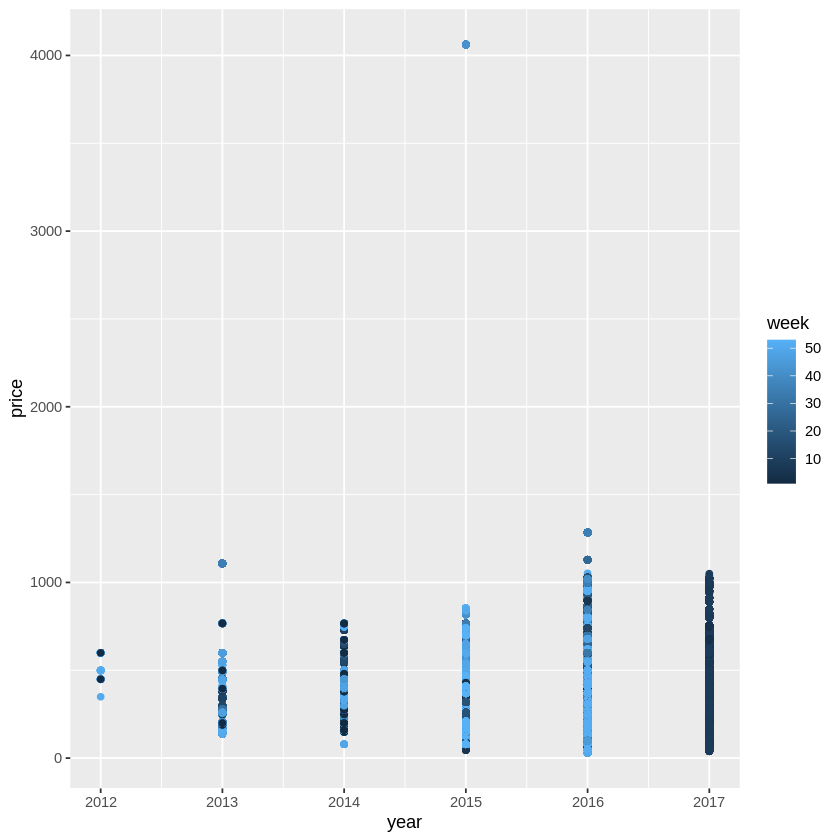

In [18]:
# PLOTS RESULTS ##########################################
# Let's explore the data by creating a line plot of the time series dataframe
# coloured by week

plot1 <- ggplot(sub_xbox360, aes(year, price, colour = week))
plot1 + geom_point()


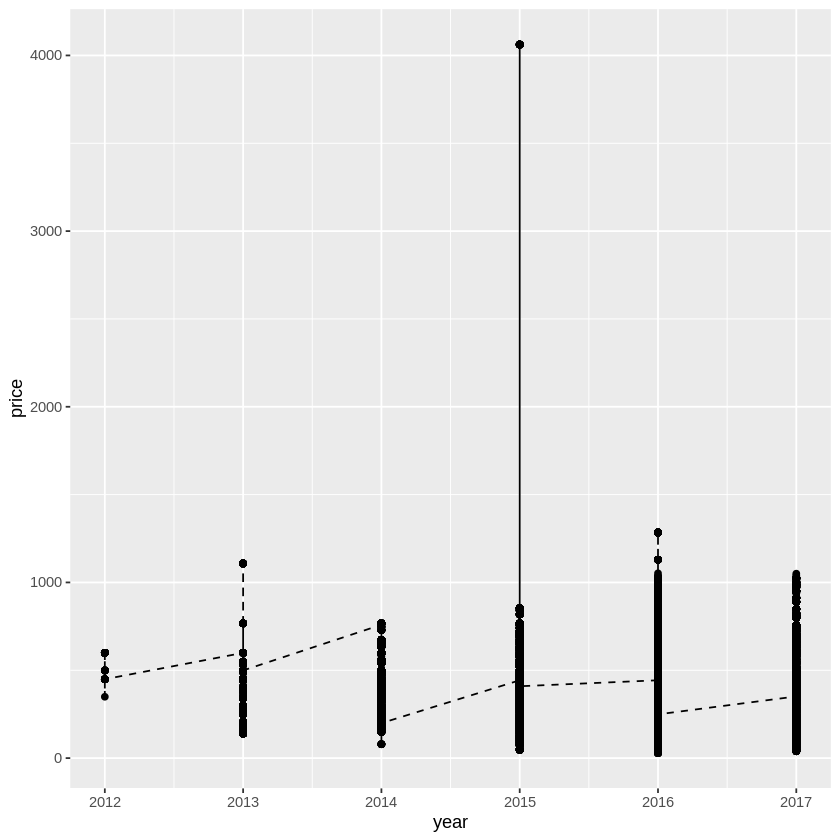

In [21]:
plot2 <- ggplot(sub_xbox360, aes(x = year, y = price, group = 1))

plot2 + geom_line(linetype = "dashed") +
geom_point()


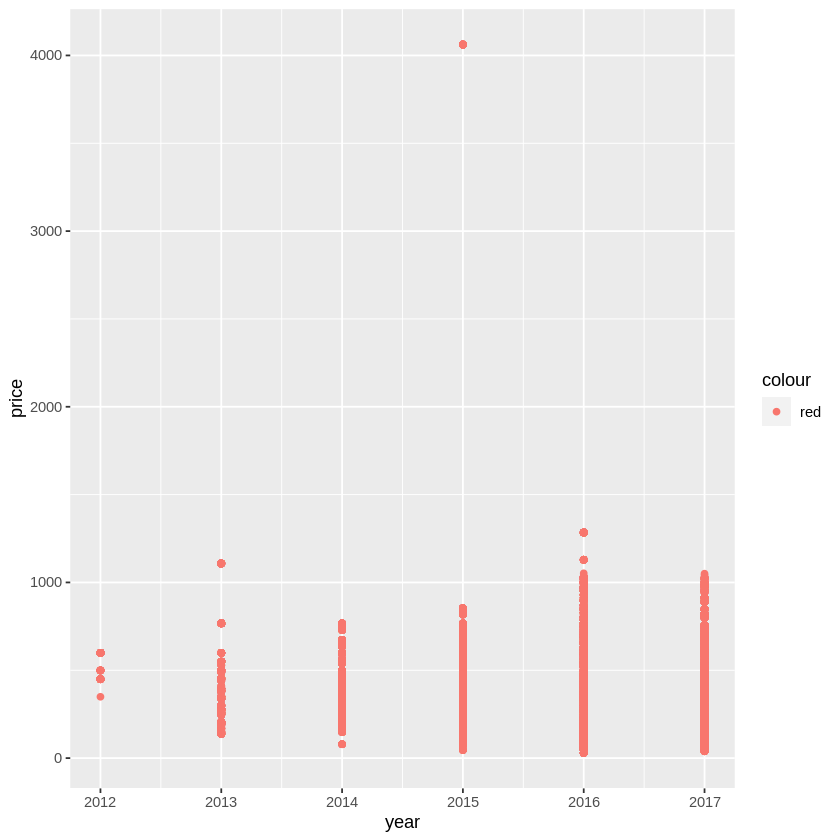

In [35]:
plot3 <- ggplot(sub_xbox360, aes(x = year, y = price, colour = "red"))

plot3 + geom_point()


Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


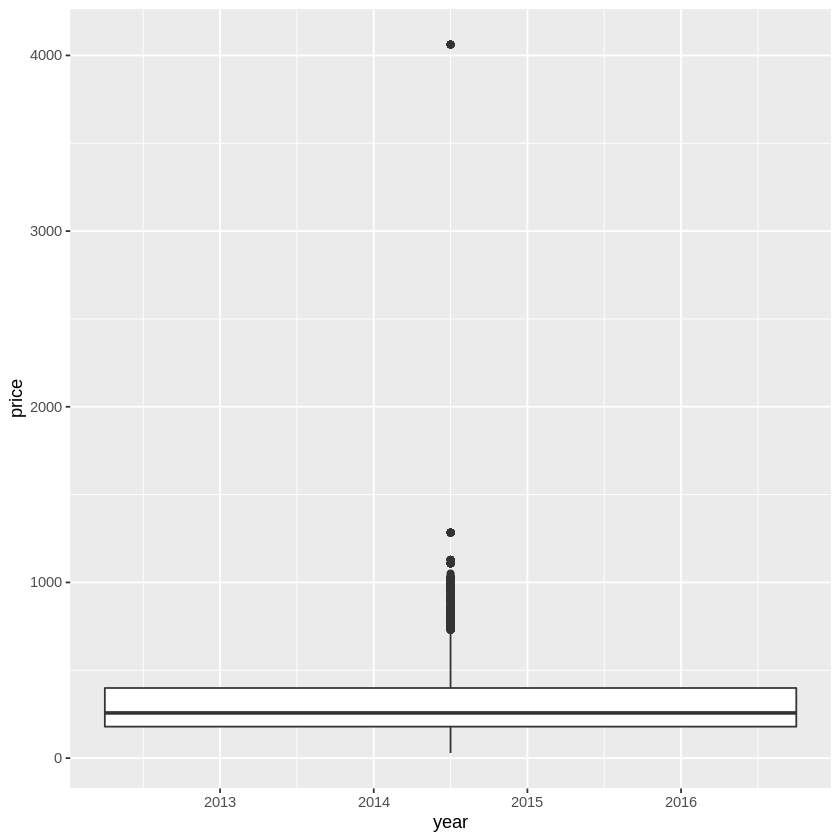

In [46]:
# There seeems to be outliners price wise
# plot them using boxplots
bxp <- ggplot(xbox360, aes(x = year, y = price))

bxp + geom_boxplot()

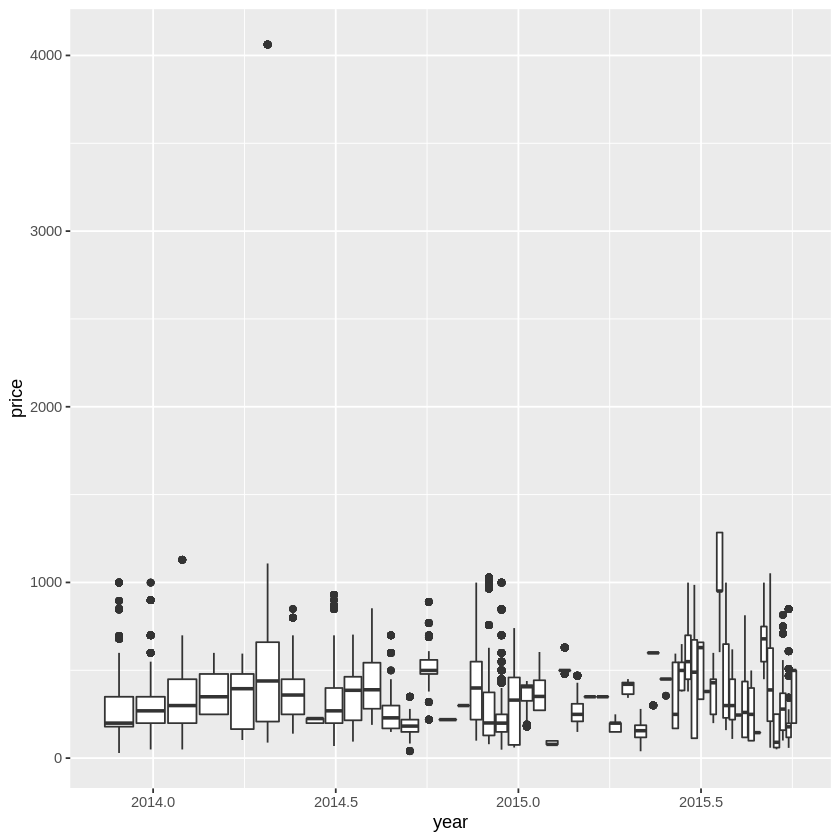

In [45]:
# There seeems to be outliners.
# plot them using boxplots

sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

bxp1 <- ggplot(data = sub_xbox360, mapping = aes(x = year, y = price, group = store_id, fill=month))

bxp1 + geom_boxplot()

In [40]:
?geom_boxplot

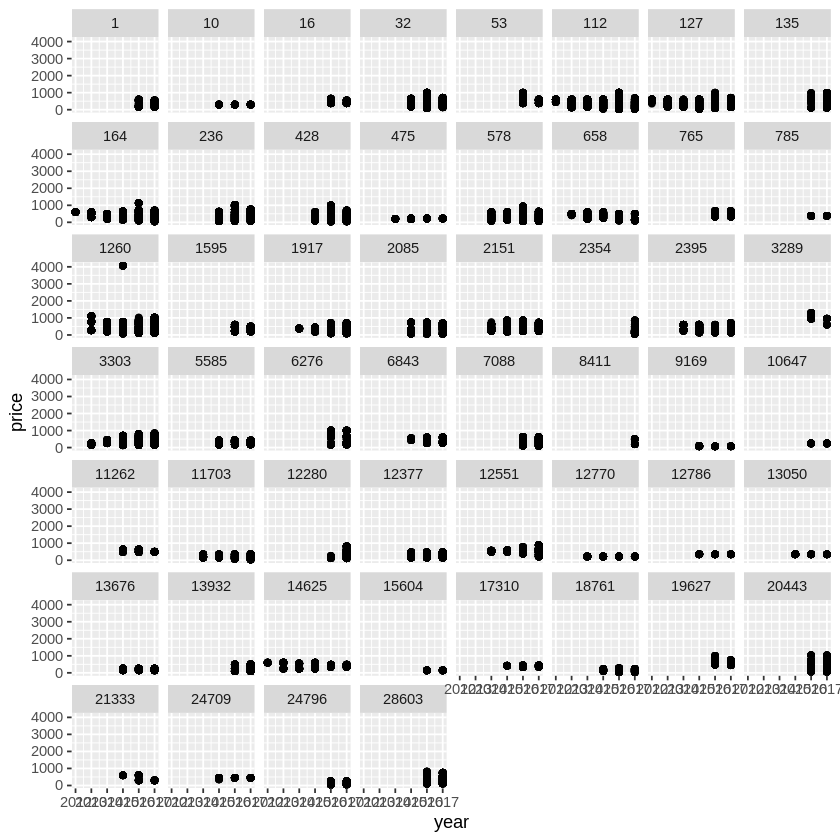

In [47]:
# Let's plot a 
# Setting alpha (as an aesthetic): 
ggplot(data = sub_xbox360) +
  geom_point(mapping = aes(x = year, y = price)) +
  facet_wrap(~store_id)

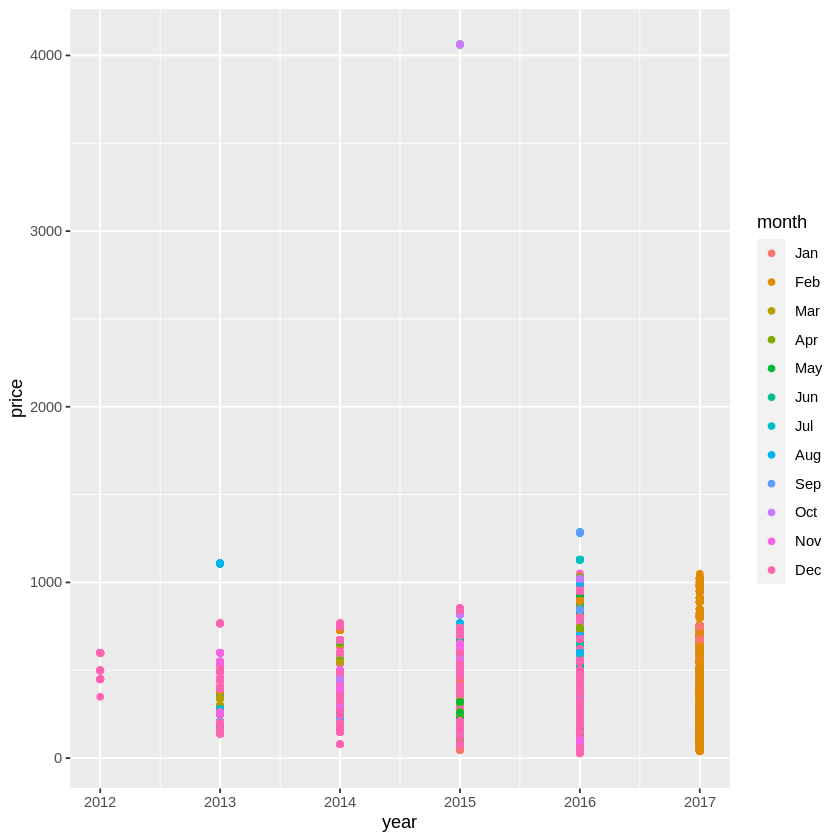

In [48]:
ggplot(sub_xbox360) +
  geom_point(aes(x = year, y = price, color = month))

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'displ' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(ca

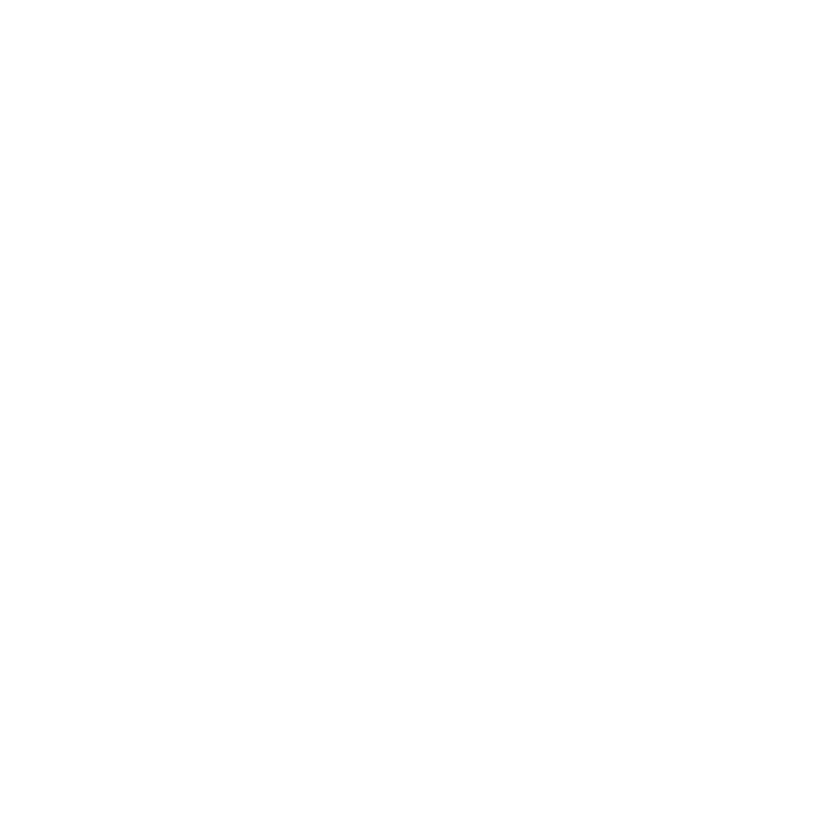

In [49]:
ggplot(sub_xbox360) +
  geom_point(aes(x = displ, y = hwy, color = store_id))

In [ ]:
zp <- ggplot(sub_headphones,
              aes(x = year, y = price))

zp + geom_col(data = referenceLines,  # Plotting the "underlayer"
                       aes(x = year, y = price, group = groupVar),
                       colour = "GRAY", alpha = 1/2, size = 1/2) +
#geom_smooth(span = 0.3) + # Drawing the "overlayer"
facet_wrap(~ month_numerical) +
theme_bw()

#ggplotly()

In [1]:
#install.packages("rpart.plot")
library(rpart)


In [3]:
#install.packages("data.tree")
install.packages("caTools")

library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [19]:
# split into training and tesing data
set.seed(123) # to always have the same dataset everytime seeding data
sample = sample.split(df$category, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

In [20]:
write.csv(train,'train.csv');
write.csv(test,'test.csv')

[timeseries with R - source](https://justinsighting.com/forecast-stock-prices-example-with-r-and-stl/)

In [8]:
install.packages(c("quantmod", "xts", "tseries", "forecast", "timeseries"), dependencies = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘timeseries’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘timeSeries’ ?”
also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’, ‘tinytex’, ‘x13binary’, ‘zoo’, ‘TTR’, ‘RMySQL’, ‘RSQLite’, ‘timeSeries’, ‘downloader’, ‘timeDate’, ‘chron’, ‘fts’, ‘tis’, ‘RUnit’, ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘urca’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [10]:
library(quantmod)
library(xts)
library(tseries)
library(forecast)
library(timeSeries)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:data.table’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: timeDate


Attaching package: ‘timeSeries’


The following object is masked from ‘package:zoo’:

    time<-




In [11]:
#install.packages("plotly")
install.packages("fpp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘expsmooth’, ‘fma’




In [12]:
#library(ggplot2)
#library(forecast)
library(plotly)
library(nlme)
library(fpp2)

ERROR: ignored

[source](https://github.com/tusharshah20/DataScience_n_R/blob/master/Rdata/CourseFiles/PrincipalComponents.R)

In [14]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
#Modeling data
# Section: 2: Principal components


# INSTALL AND LOAD PACKAGES ################################

# Packages I load every time; uses "pacman"
pacman::p_load(pacman, dplyr, GGally, ggplot2, ggthemes, 
  ggvis, httr, lubridate, plotly, rio, rmarkdown, shiny, 
  stringr, tidyr) 

library(datasets)  # Load base packages manually


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’



GGally installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ggthemes installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘bslib’, ‘shiny’



ggvis installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


plotly installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘openxlsx’



rio installed



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360,175,3.440,17.02,0,3,2
Valiant,18.1,6,225,105,3.460,20.22,0,3,1


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3391 1.5299 0.71836 0.46491 0.38903 0.35099 0.31714
Proportion of Variance 0.6079 0.2601 0.05734 0.02402 0.01682 0.01369 0.01118
Cumulative Proportion  0.6079 0.8680 0.92537 0.94939 0.96620 0.97989 0.99107
                           PC8    PC9
Standard deviation     0.24070 0.1499
Proportion of Variance 0.00644 0.0025
Cumulative Proportion  0.99750 1.0000

Standard deviations (1, .., p=9):
[1] 2.3391410 1.5299383 0.7183646 0.4649052 0.3890348 0.3509911 0.3171373
[8] 0.2406989 0.1498962

Rotation (n x k) = (9 x 9):
            PC1         PC2         PC3        PC4         PC5          PC6
mpg  -0.4023287  0.02205294 -0.17272803 -0.1366169  0.31654561 -0.718609897
cyl   0.4068870  0.03589482 -0.27747610  0.1410976  0.02066646 -0.214224005
disp  0.4046964 -0.06479590 -0.17669890 -0.5089434  0.21525777  0.010052074
hp    0.3699702  0.26518848 -0.01046827 -0.1273173  0.42166543 -0.254229405
wt    0.3850686 -0.15955242  0.33740464 -0.4469327 -0.21141143  0.002897706
qsec -0.2168575 -0.48343885  0.54815205 -0.2545226  0.05466817 -0.226660704
am   -0.2594512  0.46039449 -0.19492256 -0.5354196 -0.55331460 -0.087616182
gear -0.2195660  0.50608232  0.34579810 -0.1799814  0.50533262  0.393990378
carb  0.2471604  0.44322600  0.53847588  0.3203064 -0.25696817 -0.398353829
            PC7        PC8         PC9
mpg   0.3633216 -0.1487806  0.13567069
c

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Mazda RX4,-0.82,1.46,-0.21,0.32,-0.85,-0.01,0.25,0.07,-0.18
Mazda RX4 Wag,-0.79,1.26,0.05,0.12,-0.89,-0.08,0.25,0.16,-0.09
Datsun 710,-2.49,0.03,-0.32,-0.40,-0.37,0.54,-0.50,-0.03,0.11
Hornet 4 Drive,-0.29,-1.93,-0.32,-0.07,0.21,-0.05,-0.01,0.01,-0.12
Hornet Sportabout,1.56,-0.81,-1.04,0.05,0.38,-0.14,0.15,0.08,-0.15
Valiant,-0.21,-2.19,0.14,-0.07,-0.08,0.27,-0.26,0.28,0.02
Duster 360,2.73,0.29,-0.58,0.53,0.20,-0.21,-0.40,-0.36,-0.17
Merc 240D,-1.80,-1.27,1.03,0.14,0.40,0.22,0.54,-0.33,0.03
Merc 230,-1.90,-1.93,1.96,-0.26,0.61,-0.08,-0.39,0.34,-0.19
Merc 280,0.02,-0.06,1.06,0.74,0.14,0.10,0.43,0.00,0.11


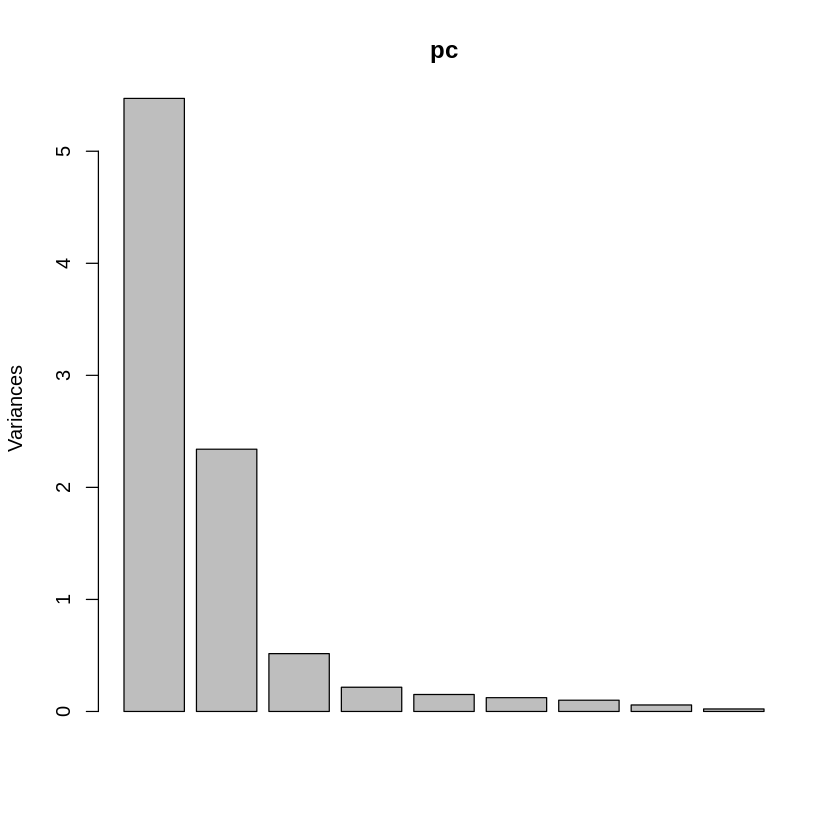

The following packages have been unloaded:
tidyr, stringr, shiny, rmarkdown, rio, plotly, lubridate, httr, ggvis, ggthemes, GGally, dplyr, pacman, ggplot2, timeSeries, timeDate, forecast, tseries, quantmod, TTR, xts, zoo, data.table, caTools, rpart




null device 
          1

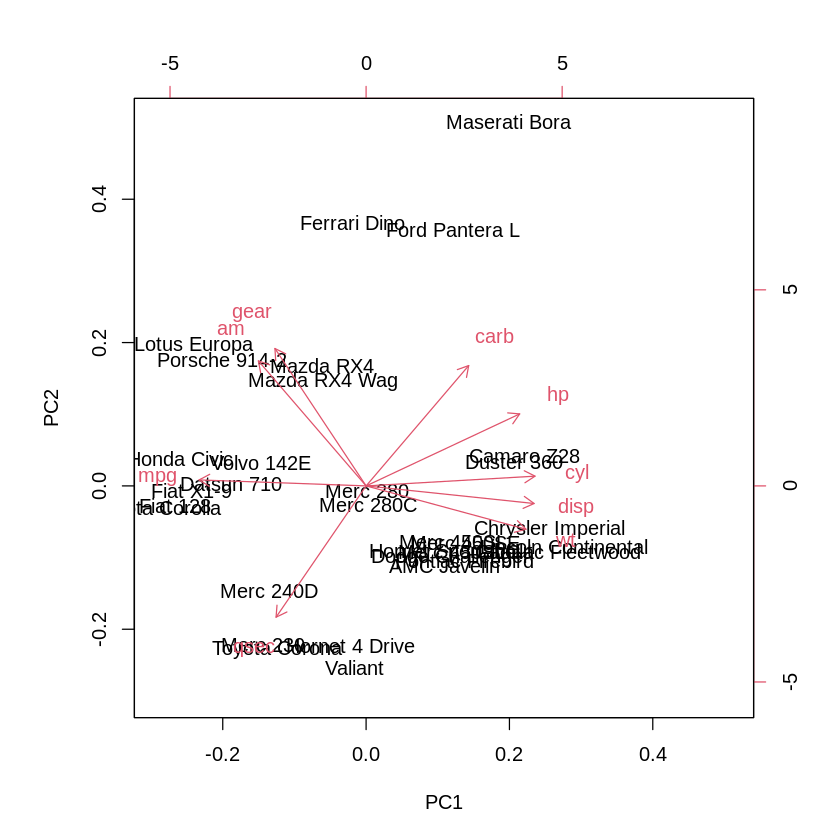

In [16]:
# LOAD DATA ################################################

head(mtcars)
cars <- mtcars[, c(1:4, 6:7, 9:11)]  # Select variables
head(cars)

# COMPUTE PCA ##############################################

# For entire data frame ####################################
pc <- prcomp(cars,
        center = TRUE,  # Centers means to 0 (optional)
        scale = TRUE)   # Sets unit variance (helpful)

# To specify variables #####################################

pc <- prcomp(~ mpg + cyl + disp + hp + wt + qsec + am +
        gear + carb, 
        data = mtcars, 
        center = TRUE,
        scale = TRUE)

# EXAMINE RESULTS ##########################################

# Get summary stats
summary(pc)

# Screeplot for number of components
plot(pc)

# Get standard deviations and rotation
pc

# See how cases load on PCs
predict(pc) %>% round(2)

# Biplot of first two components
biplot(pc)

# CLEAN UP #################################################

# Clear environment
rm(list = ls()) 

# Clear packages
p_unload(all)  # Remove all add-ons
detach("package:datasets", unload = TRUE)  # For base

# Clear plots
dev.off()  # But only if there IS a plot

# Clear console
cat("\014")  # ctrl+L

# Clear mind :)

### Experiments

Note. To check whether a variable is not in a typle (x,y)
with dplyr package



```
'%!in%' <- function(x,y)!('%in%'(x,y))
```



In [ ]:
# Identify unique values for column year
sub_headphones$year[!duplicated(sub_headphones$year)]

[1] 2014 2015 2016 2017 2012 2013

In [ ]:
# Or with namespace ‘dplyr’, alreadyimported by ‘plotly’, ‘tidyr’

distinct(data.frame(sub_headphones$year))             # Using distinct function

sub_headphones.year
<int>
2014
2015
2016
2017
2012
2013


In [ ]:
# convert the string of dates into R 'Date' object
# source: https://stats.idre.ucla.edu/r/faq/how-can-i-format-a-string-containing-a-date-into-r-date-object/

 sub_headphones$date <- as.Date(sub_headphones$date, "%Y-%m-%d"); head(sub_headphones$date,3)

[1] "2014-09-19" "2014-09-21" "2014-09-21"

In [ ]:
class(sub_headphones$date)

[1] "Date"

### Visualization

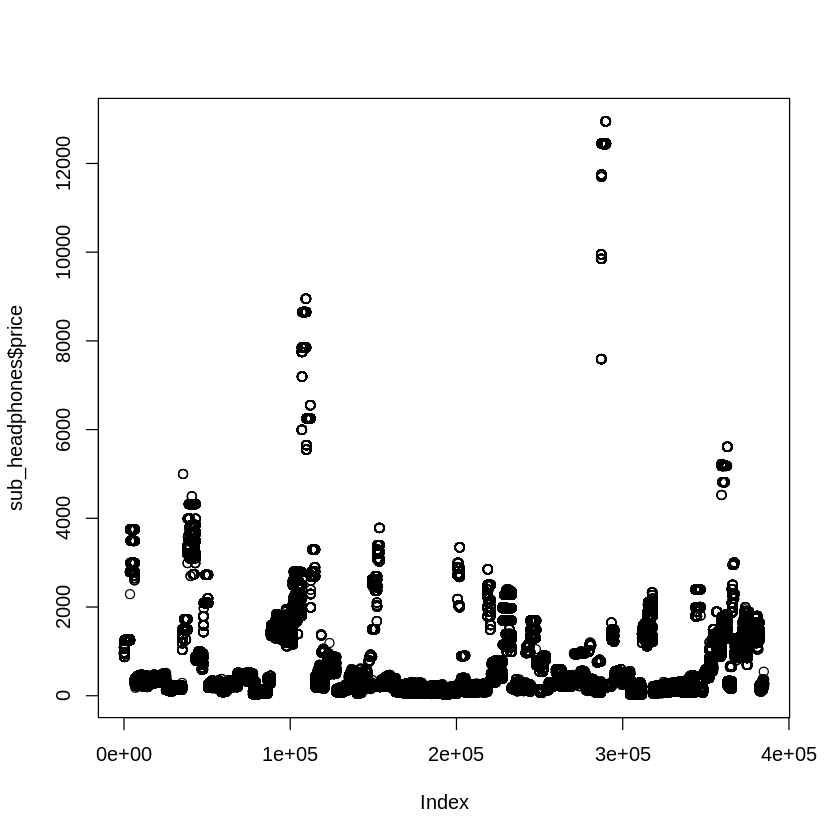

In [ ]:
plot(sub_headphones$price)

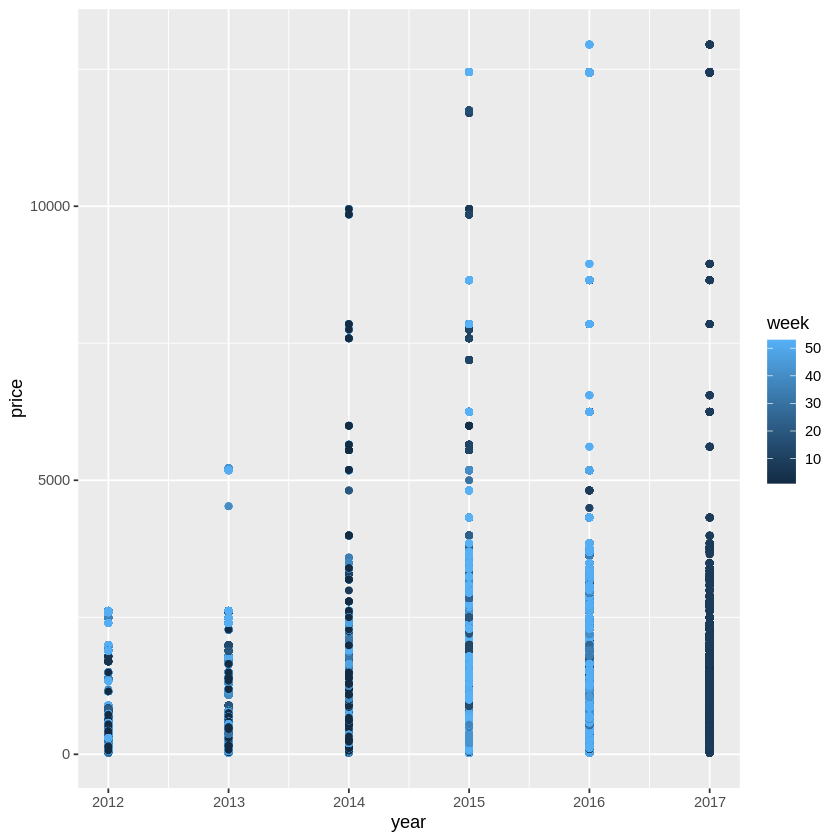

In [ ]:
a <- ggplot(sub_headphones, aes(year, price, colour = week))
a + geom_point()

In [ ]:
#a + geom_jitter(height = 2, width = 2)

#install.packages("quantreg")
#library(quantreg)


Smoothing formula not specified. Using: y ~ x

`geom_smooth()` using formula 'y ~ x'



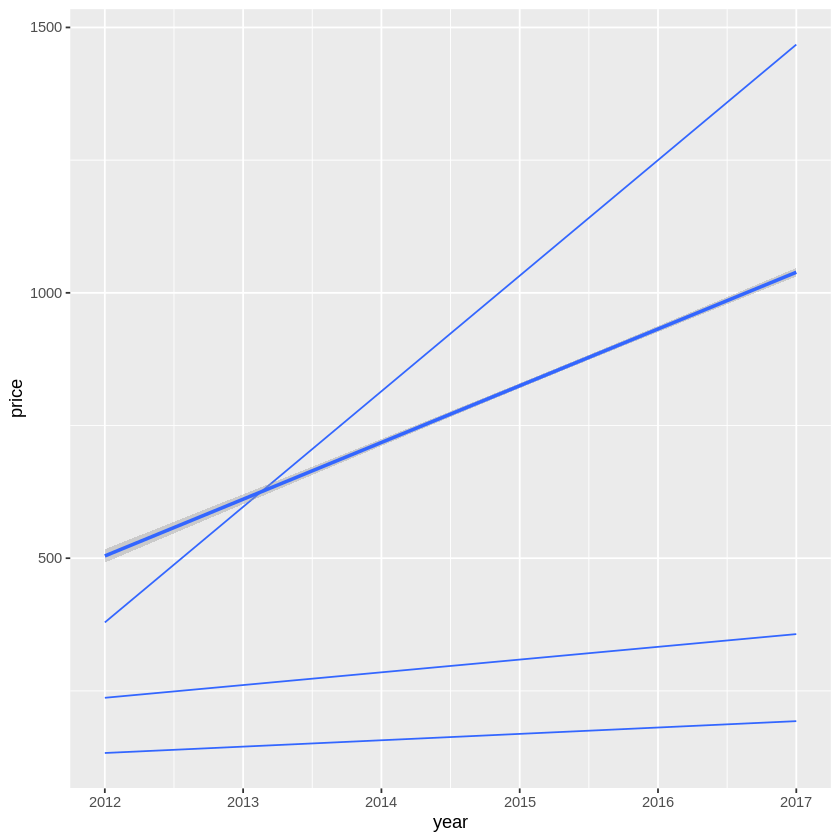

In [ ]:
a + geom_quantile()

`geom_smooth()` using formula 'y ~ x'



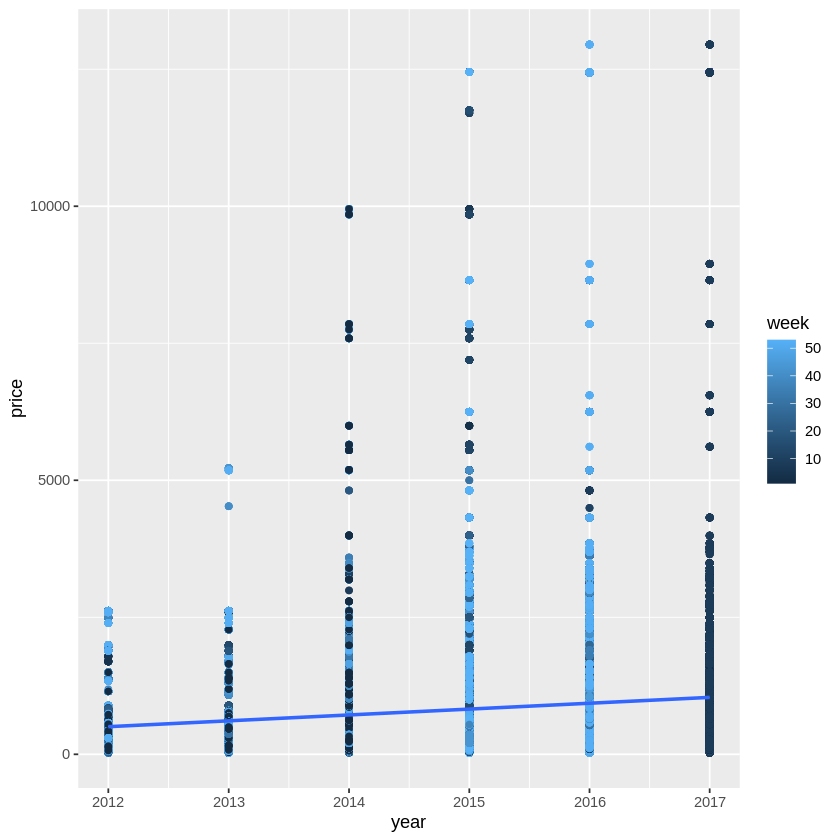

In [ ]:
a + geom_point() + 
geom_smooth(method = lm, span=0.3) +
#xlab("Year") +
#ylab("Price") +
scale_x_log10()

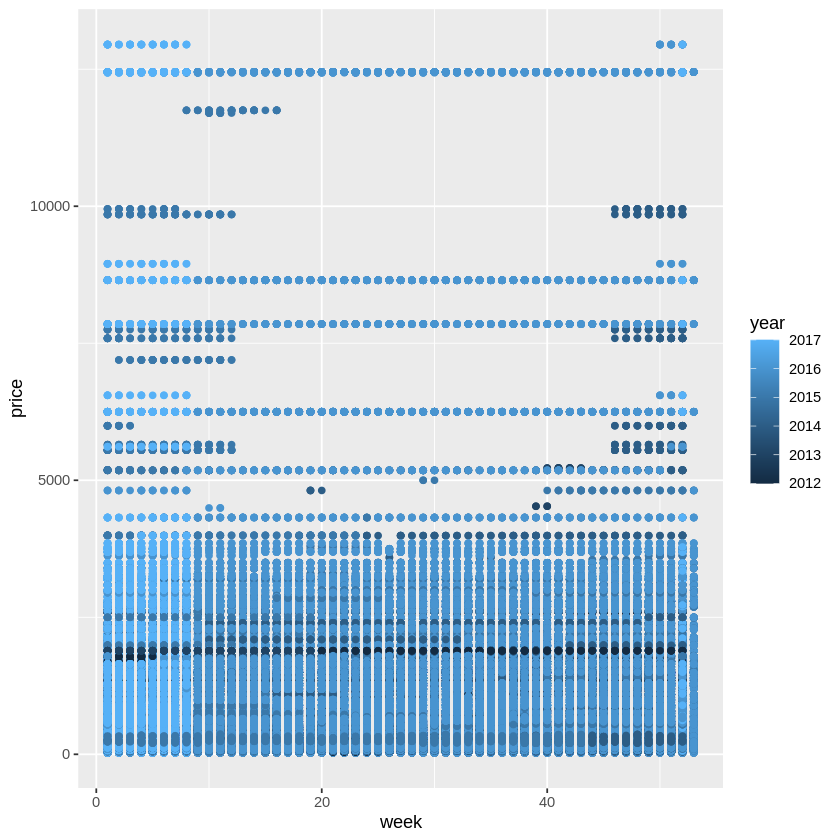

In [ ]:
b <- ggplot(sub_headphones, aes(week, price, colour = year))
b + geom_point()

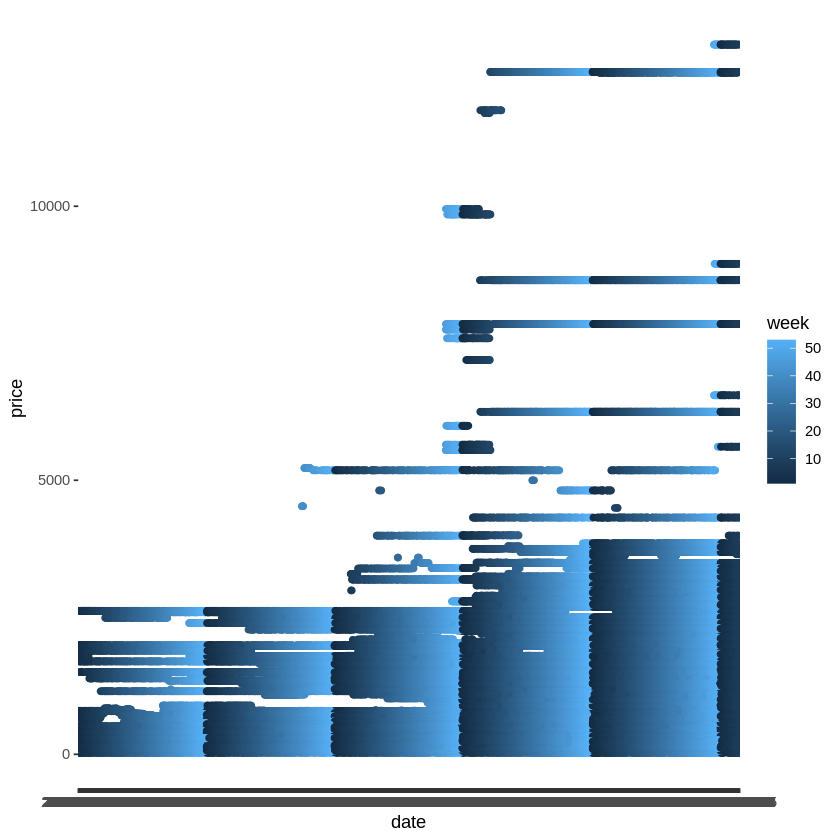

In [ ]:
c <- ggplot(sub_headphones, aes(date, price, colour = week))

c + geom_point()

`geom_smooth()` using formula 'y ~ x'



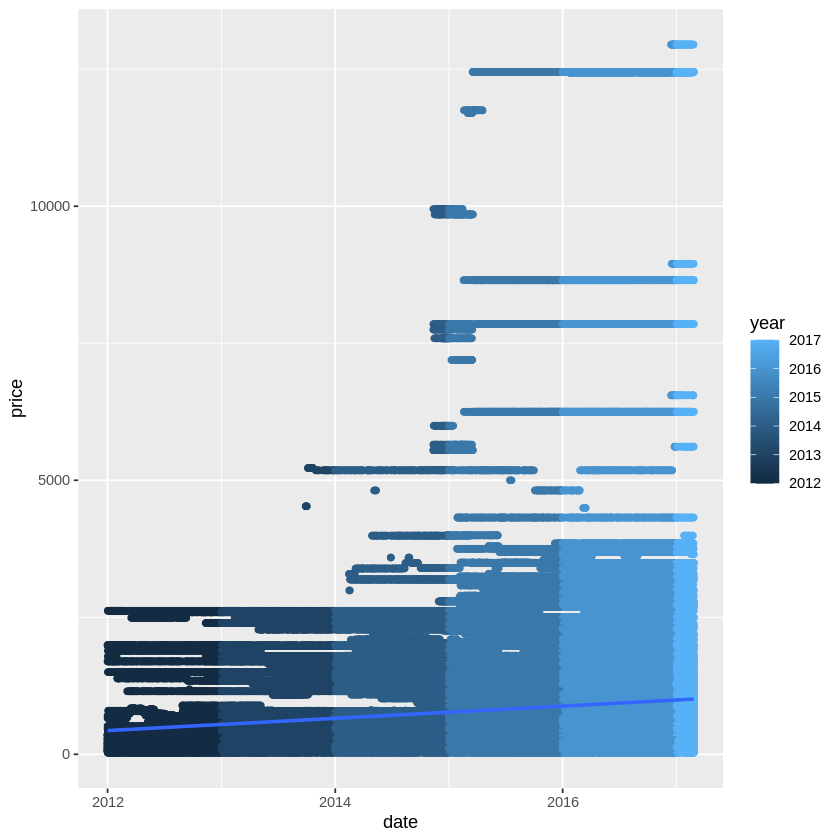

In [ ]:
c + geom_point() + 
geom_smooth(m)
#geom_smooth(method = lm, span=0.3)
#xlab("Year") +
#ylab("Price") +

### FACET_WRAP WITH A TIME SERIES
[source](https://plotly.com/ggplot2/time-series/)

In [ ]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘data.table’




In [ ]:
head(AirPassengers,3)

,Jan,Feb,Mar
1949,112,118,132


In [ ]:
# Air passenger data. ts converted to long matrix:
myData <- data.frame(Year = c(floor(time(AirPassengers) + .01)),
                     Month = c(cycle(AirPassengers)),
                     Value = c(AirPassengers))
# easy conversion code from: http://stackoverflow.com/a/4973859/479554

# convert month numbers to names, using a built-in constant:
myData$Month <- factor(myData$Month)
levels(myData$Month) <- month.abb


In [ ]:
tail(myData,3)

,Year,Month,Value
,<dbl>,<fct>,<dbl>
142,1960,Oct,461
143,1960,Nov,390
144,1960,Dec,432


### Let's proceed the same with pricing dataset

In [ ]:
tail(sub_headphones,3)

,date,price,week,year,month_numerical
,<chr>,<int>,<int>,<int>,<fct>
599000,2015-10-24,208,43,2015,Oct
599001,2015-10-25,268,43,2015,Oct
599002,2015-10-25,263,43,2015,Oct


In [ ]:
# plotting reference lines across each facet:

referenceLines <- sub_headphones  # \/ Rename
colnames(referenceLines)[1] <- "groupVar"


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”
Warning message:
“Computation failed in `stat_smooth()`:
x has insufficien

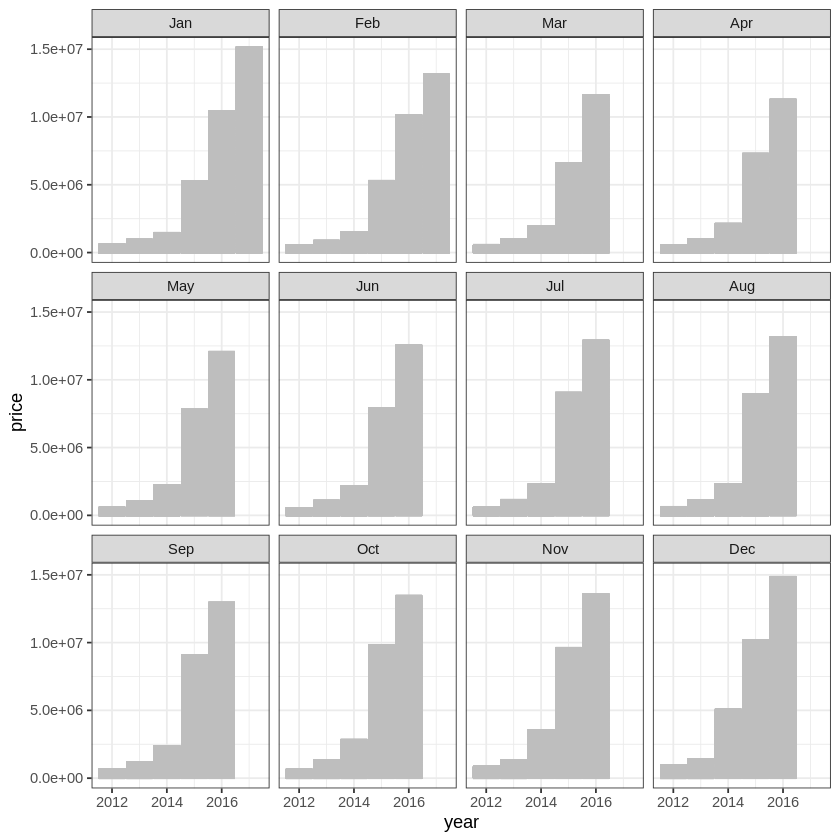

In [ ]:
a <- ggplot(sub_headphones, aes(year, price, colour = week))
a + geom_point()

zp <- ggplot(sub_headphones,
              aes(x = year, y = price))

zp + geom_col(data = referenceLines,  # Plotting the "underlayer"
                       aes(x = year, y = price, group = groupVar),
                       colour = "GRAY", alpha = 1/2, size = 1/2) +
#geom_smooth(span = 0.3) + # Drawing the "overlayer"
facet_wrap(~ month_numerical) +
theme_bw()

#ggplotly()

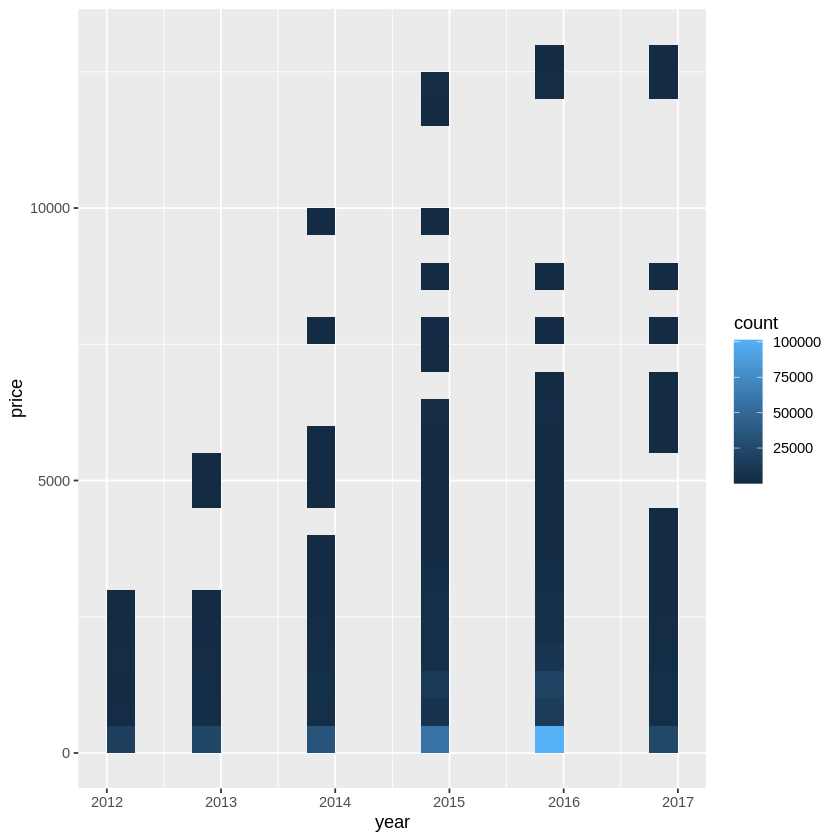

In [ ]:
zp + geom_bin2d(binwidth = c(0.25, 500))

In [ ]:
#devtools::install_github("hrbrmstr/hrbrthemes")
#library(hrbrthemes)

In [ ]:
# current verison
#packageVersion("hrbrthemes")

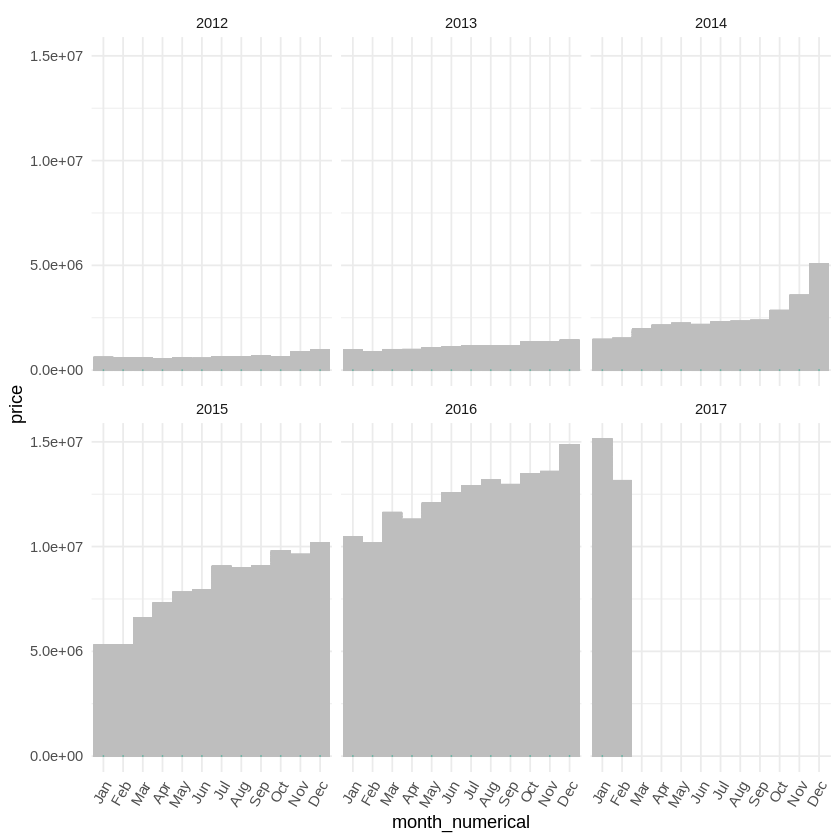

In [ ]:
d <- ggplot(sub_headphones,
              aes(x = month_numerical, y = price))

d + geom_col(data = referenceLines,  # Plotting the "underlayer"
                       aes(x = month_numerical, y = price, group = groupVar),
                       colour = "GRAY", alpha = 1/2, size = 1/2) +
#geom_smooth(span = 0.3) + # Drawing the "overlayer"
facet_wrap(~ year) +
geom_line(color="#69b3a2") +
theme_minimal() +
theme(axis.text.x=element_text(angle=60, hjust=1))

#ggplotly()

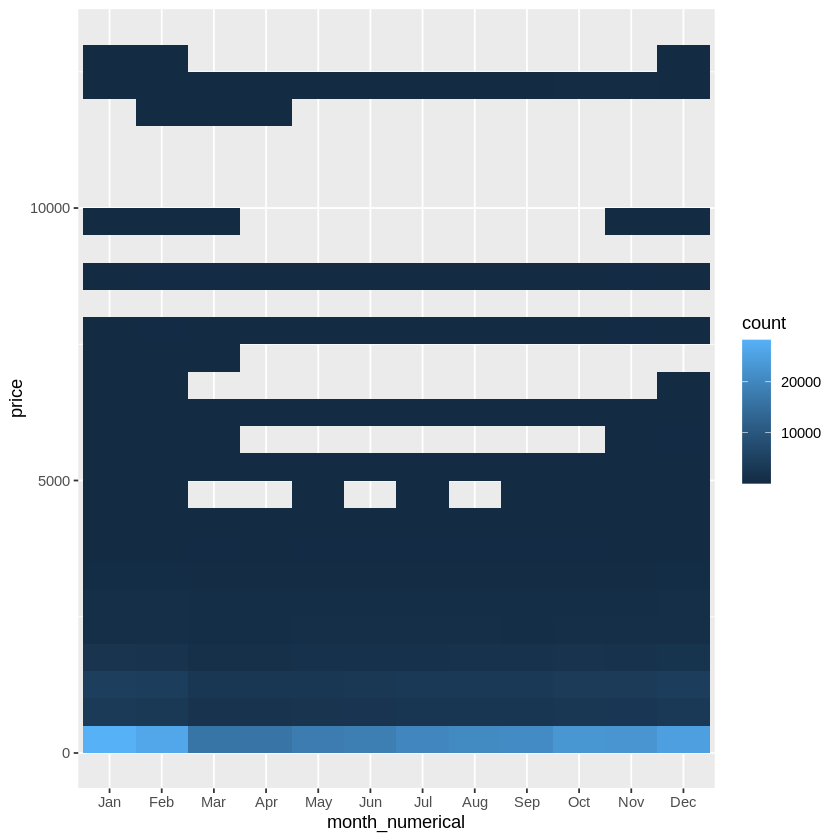

In [ ]:
d + geom_bin2d(binwidth = c(0.25, 500))

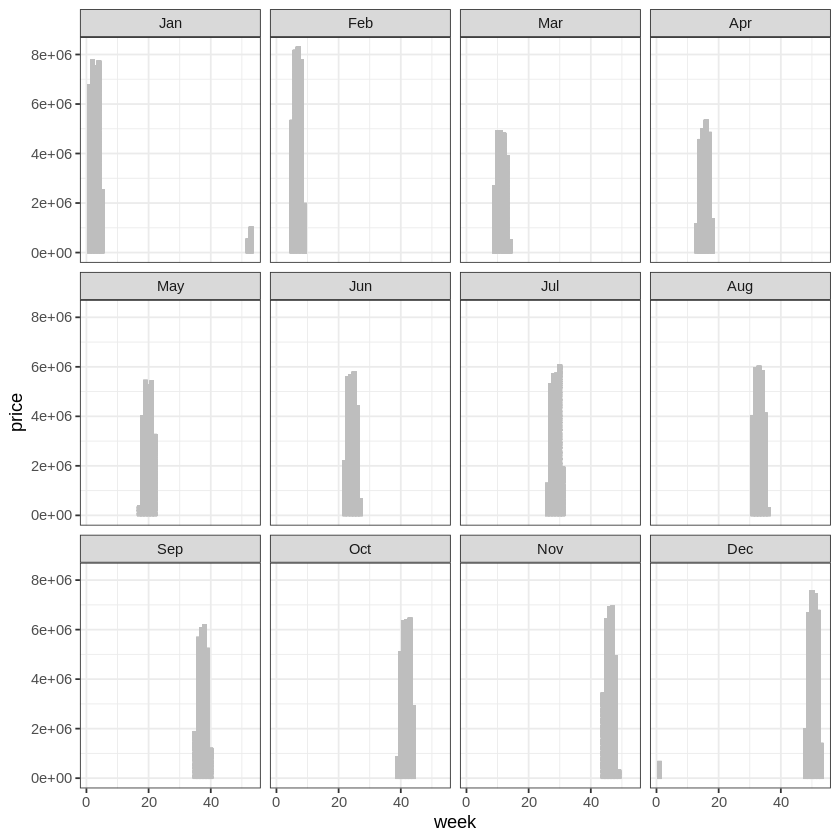

In [ ]:
e <- ggplot(sub_headphones,
              aes(x = week, y = price))

e + geom_col(data = referenceLines,  # Plotting the "underlayer"
                       aes(x = week, y = price, group = groupVar),
                       colour = "GRAY", alpha = 1/2, size = 1/2) +
#geom_smooth(span = 0.3) + # Drawing the "overlayer"
facet_wrap(~ month_numerical) +
theme_bw()

#ggplotly()

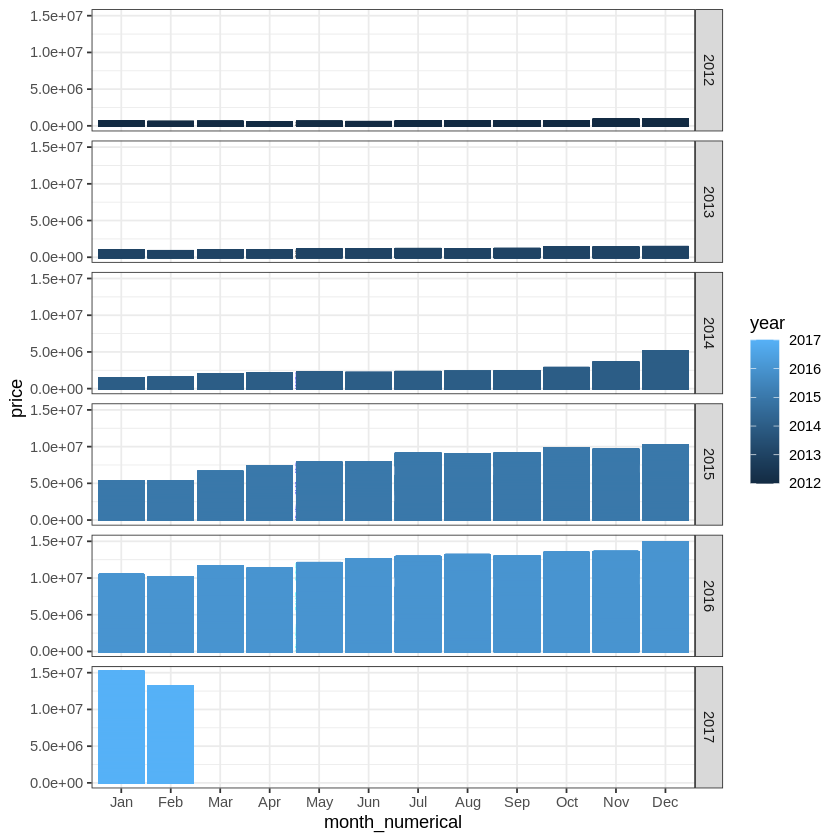

In [ ]:
# ggplot2 for two variables (discrete x , continuous y)
f <- ggplot(data = sub_headphones,
       mapping = aes(x = month_numerical, y = price, colour = year))

f + geom_col() +
geom_line() +
facet_grid(facets = year ~ .) +
theme_bw()

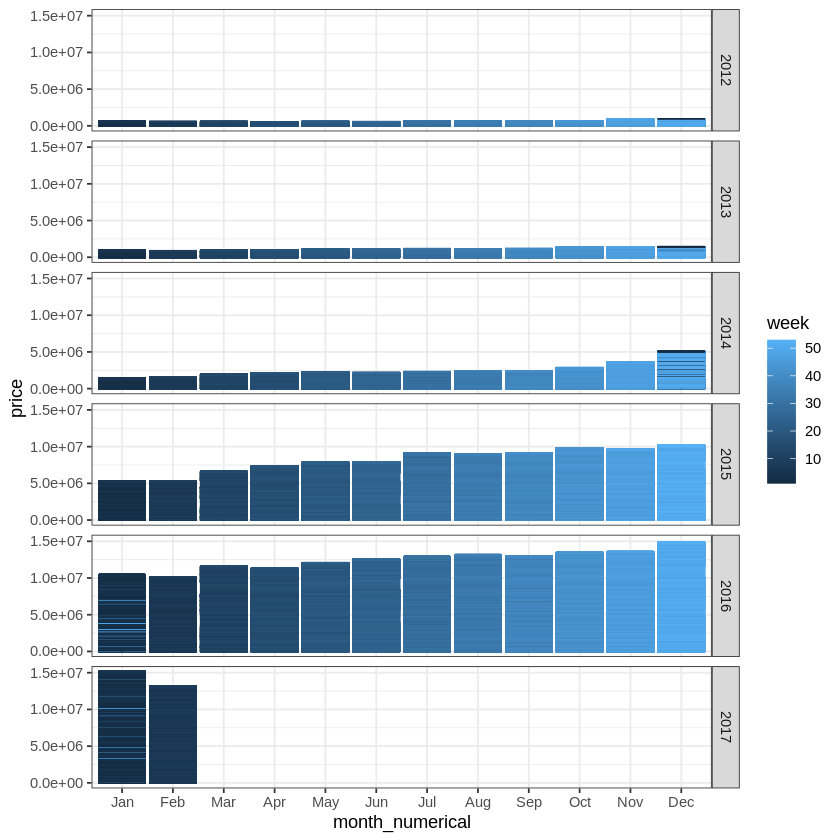

In [ ]:
f <- ggplot(data = sub_headphones,
       mapping = aes(x = month_numerical, y = price, colour = week))

f + geom_col() +
geom_line() +
facet_grid(facets = year ~ .) +
theme_bw()

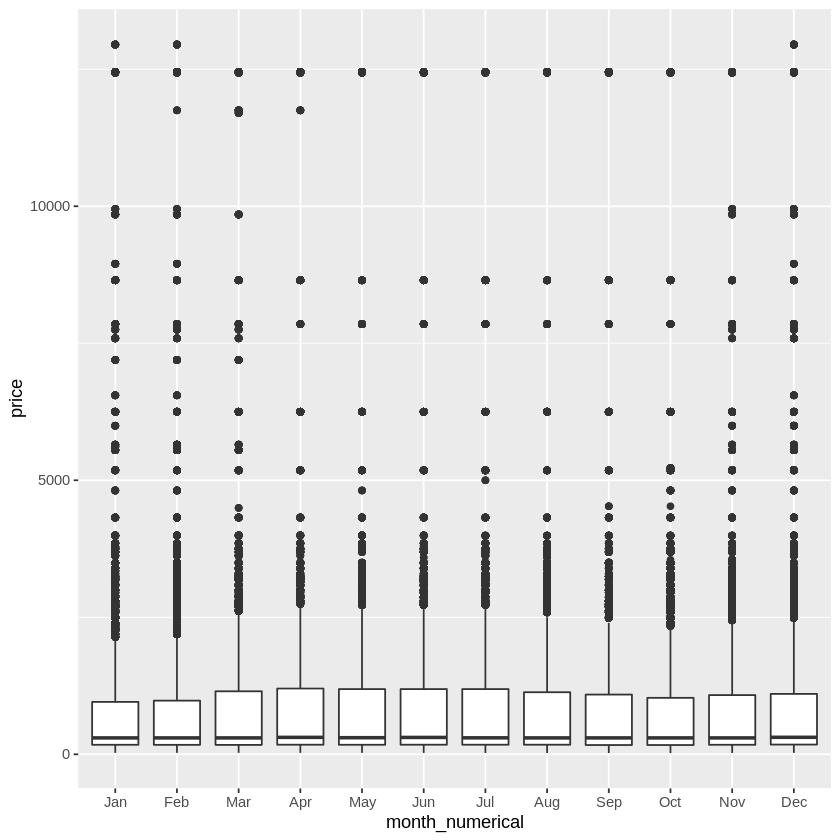

In [ ]:
f + geom_boxplot()

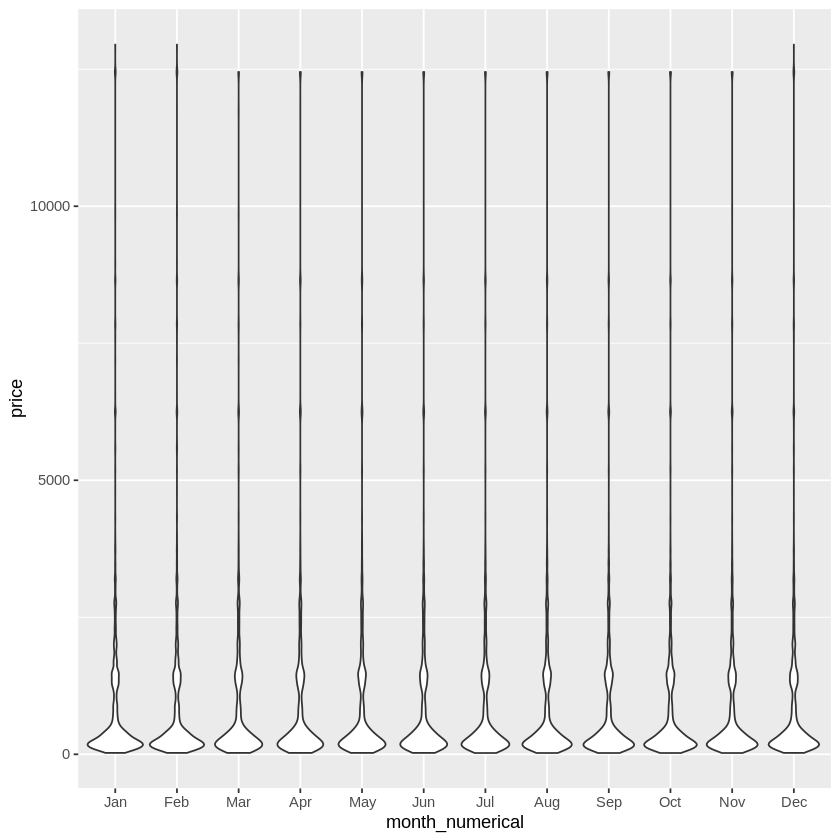

In [ ]:
f + geom_violin(scale = "area")

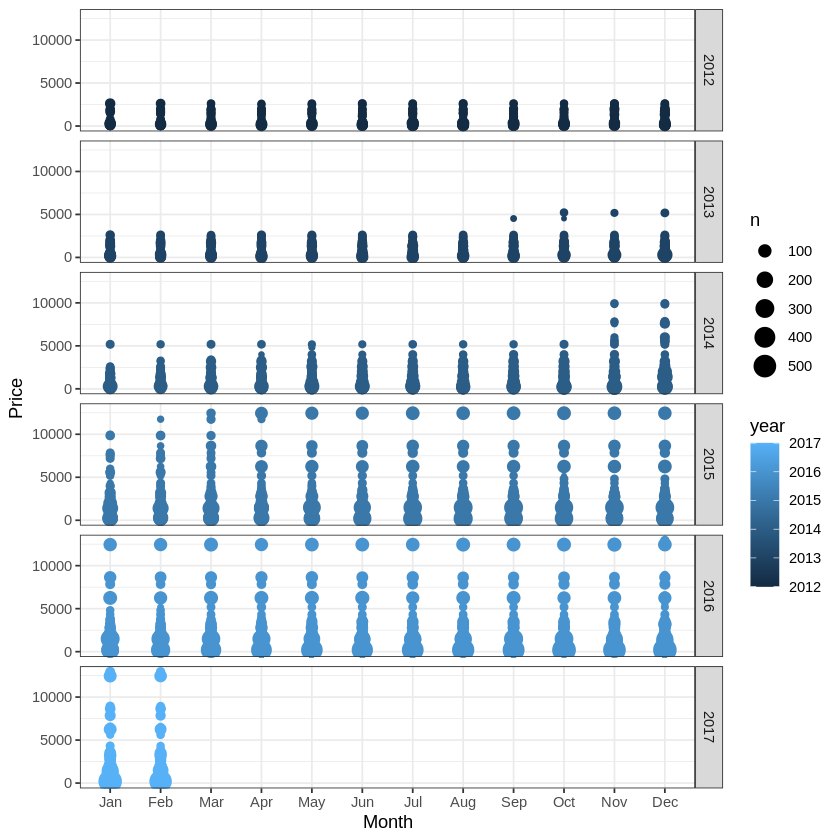

In [ ]:
g <- ggplot(data = sub_headphones,
       mapping = aes(x = month_numerical, y = price, colour = year))

g + geom_count() + 
facet_grid(facets = year ~ .) +
xlab("Month") +
ylab("Price") +
theme_bw()

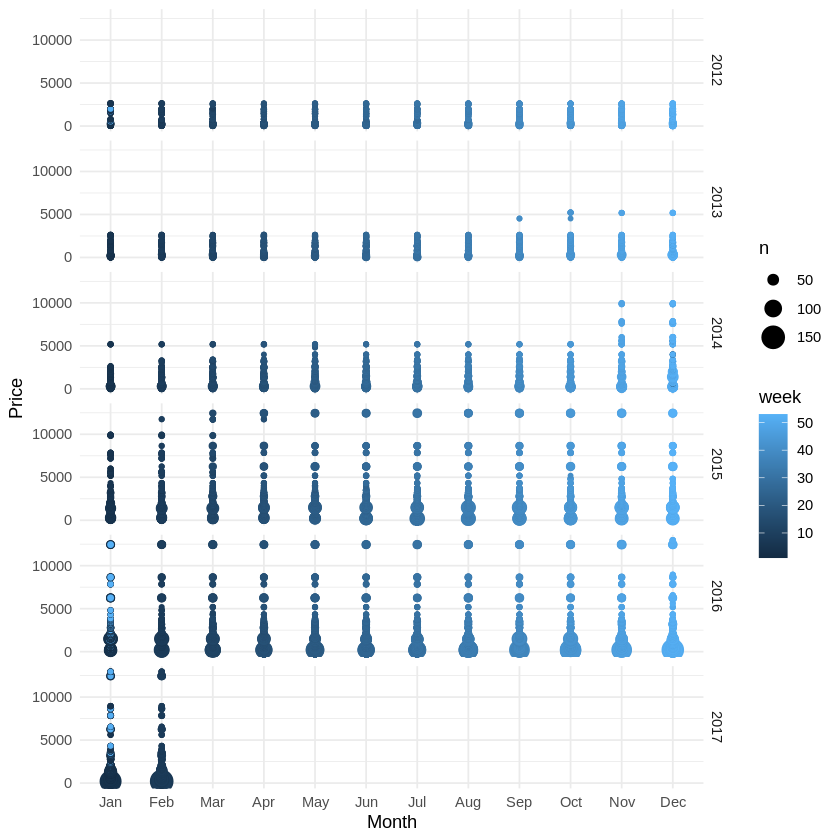

In [ ]:
h <- ggplot(data = sub_headphones,
       mapping = aes(x = month_numerical, y = price, colour = week))

h + geom_count() + 
scale_radius(range = c(1,6)) +
facet_grid(facets = year ~ .) +
xlab("Month") +
ylab("Price") +
#theme_bw()
theme_minimal()

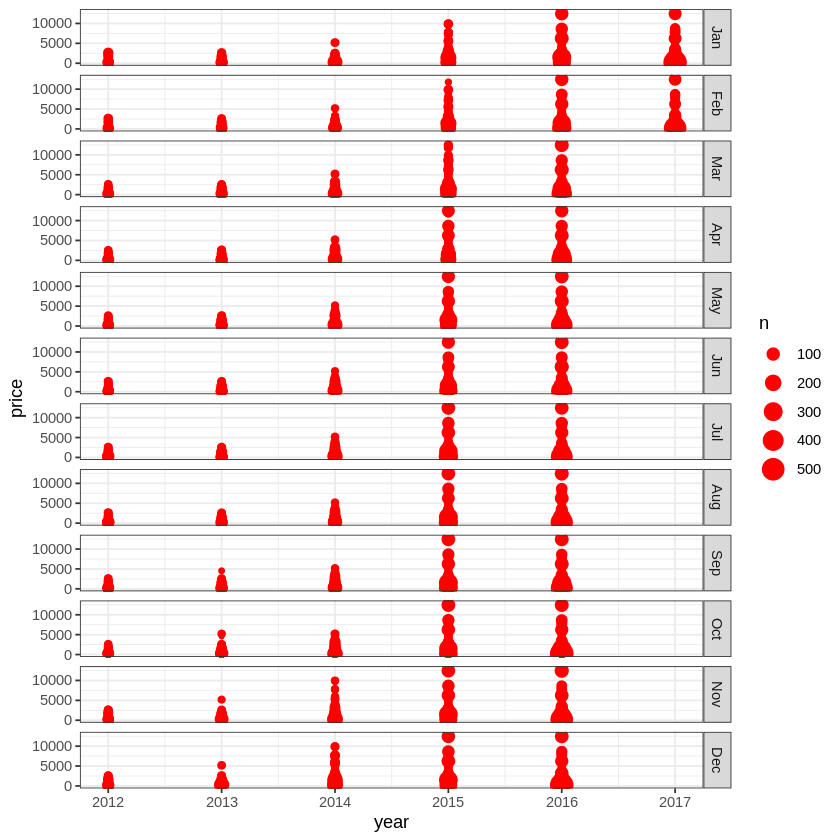

In [ ]:
zp + geom_count(colour = "red") +
facet_grid(facets = month_numerical ~ .) +
theme_bw()

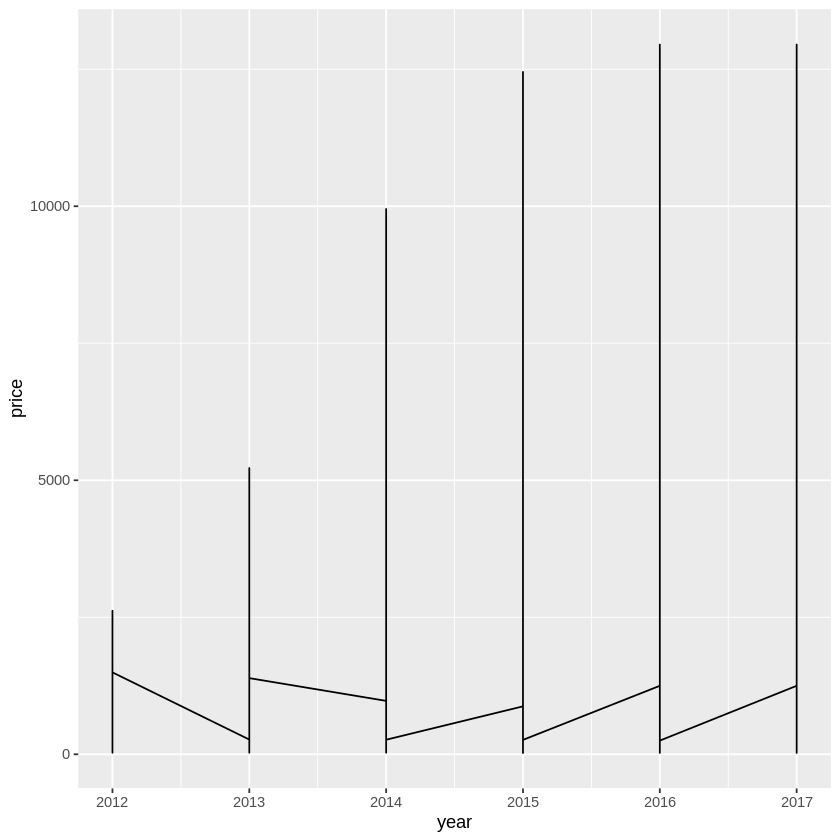

In [ ]:
zp + geom_line()

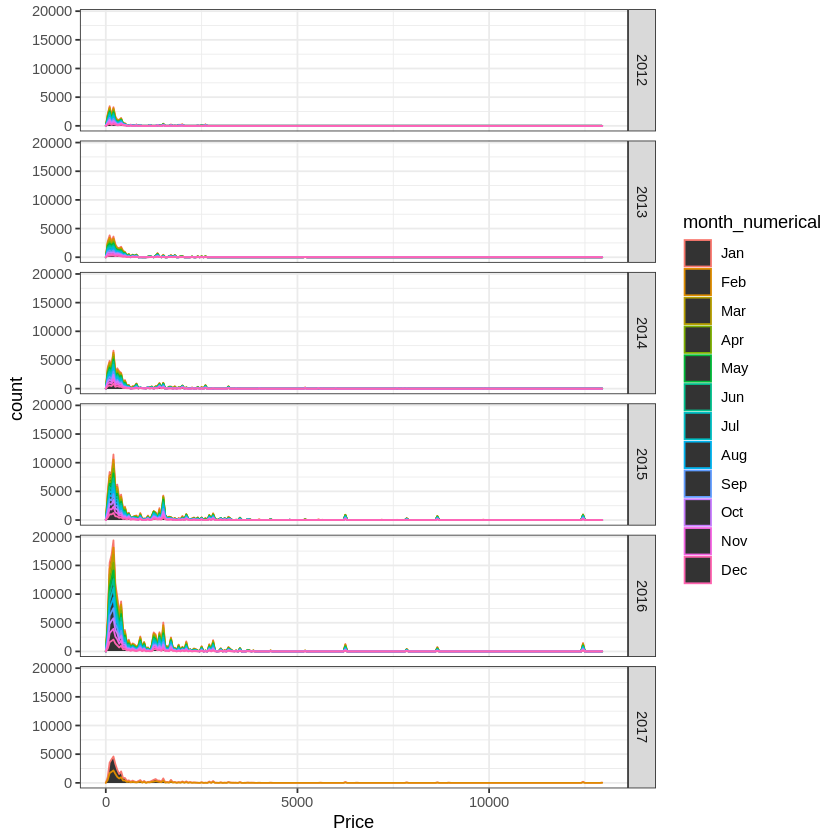

In [ ]:
i <- ggplot(sub_headphones, aes(price, colour = month_numerical))

i + geom_area(stat = "bin", binwidth = 50) +
facet_grid(facets = year ~ .) +
xlab("Price") +
#ylab("count") +
theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



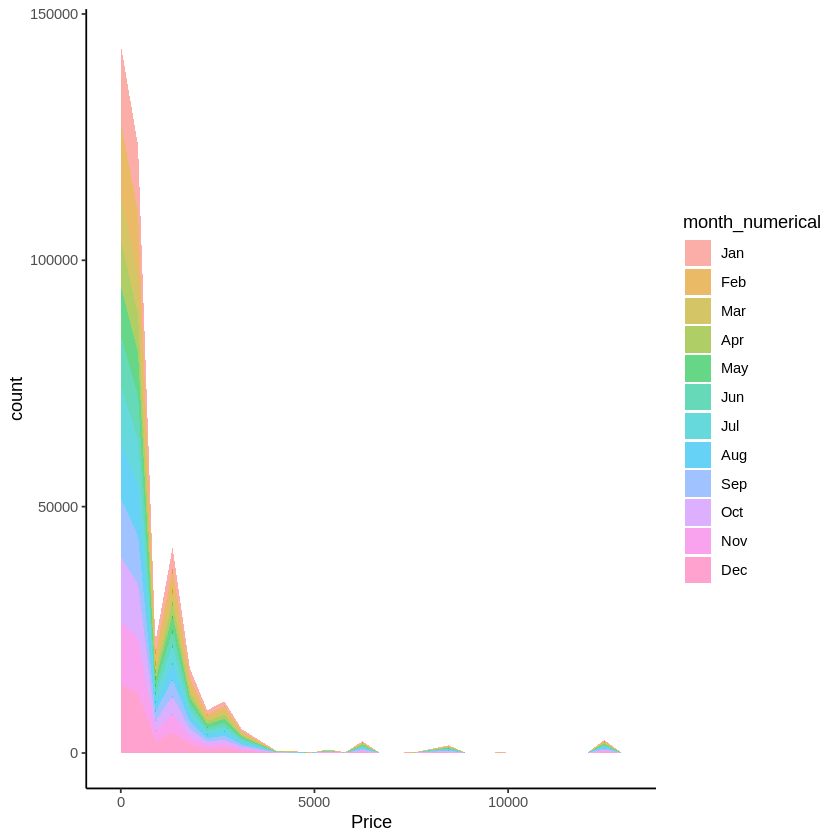

In [ ]:
i <- ggplot(sub_headphones, aes(price, fill=month_numerical))

i + geom_area(stat = "bin", alpha = 0.6) +
#facet_grid(facets = year ~ .) +
xlab("Price") +
#ylab("count") +
theme_classic()

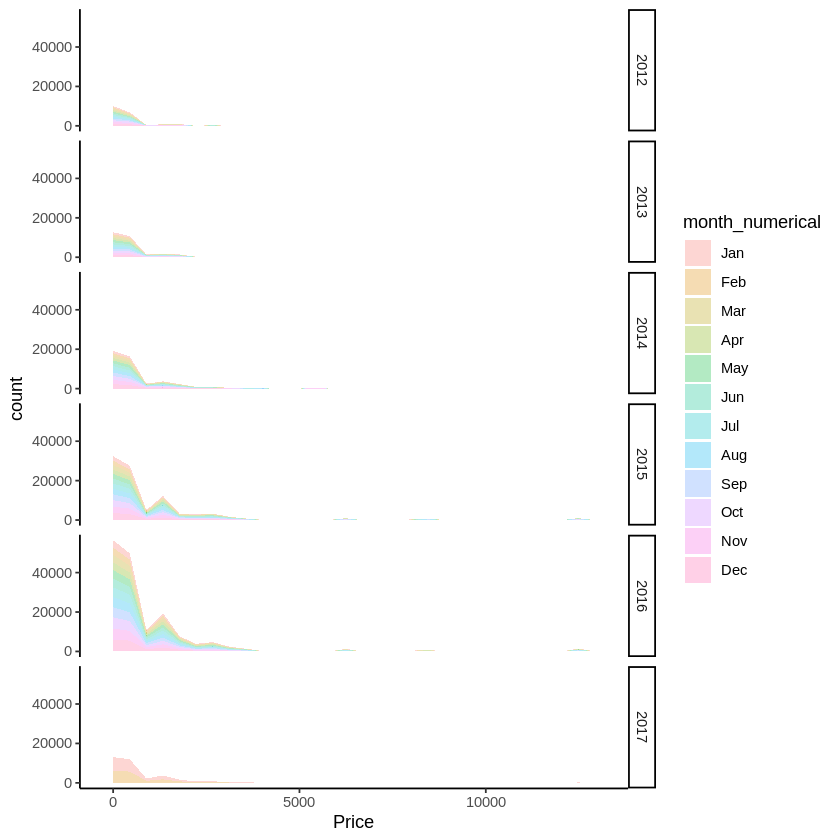

In [ ]:
i + geom_area(stat = "bin", bins=30, alpha = 0.3) +
facet_grid(facets = year ~ .) +
xlab("Price") +
#ylab("count") +
theme_classic()

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: brewer
    train: function
    train_d

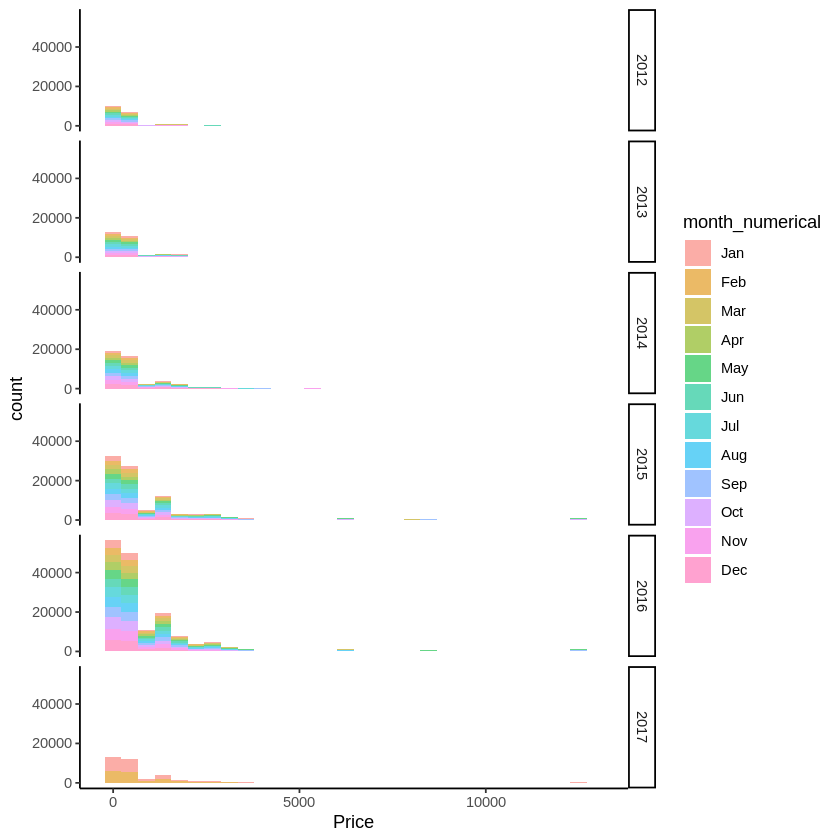

In [ ]:
i + geom_bar(stat = "bin", bins = 30, alpha = 0.6) +
facet_grid(facets = year ~ .) +
xlab("Price") +
#ylab("count") +
theme_classic()
scale_fill_brewer(palette="Dark2")

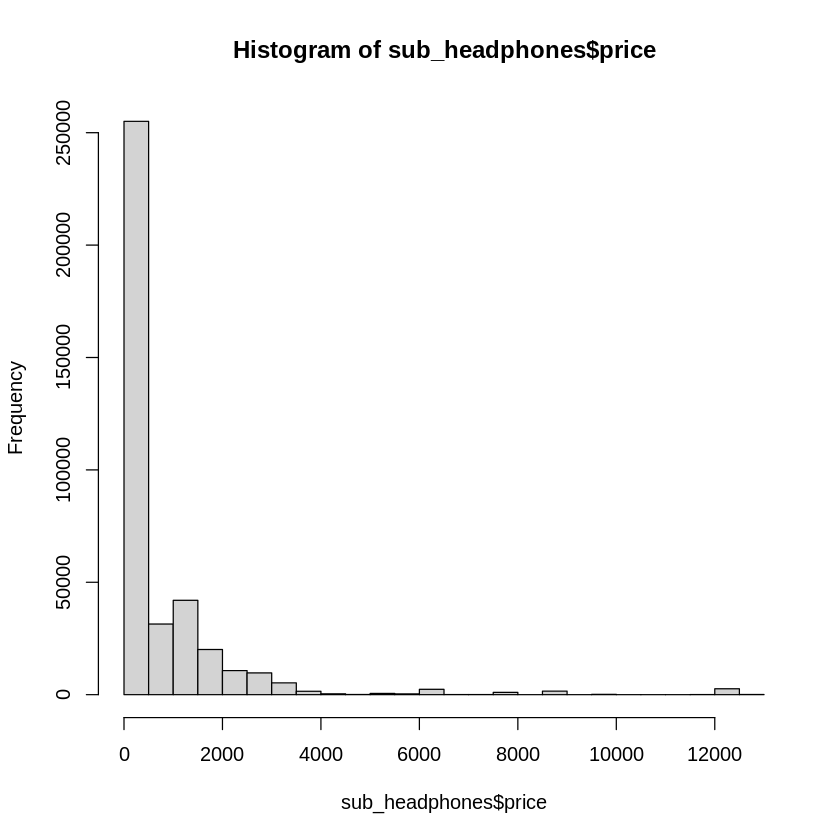

In [ ]:
#j <- ggplot(sub_headphones, aes(price))

#j + geom_histogram(binwidth = 5) +
#facet_grid(facets = year ~ .) +
#xlab("Price") +
#ylab("count") +
#theme_classic()

hist(sub_headphones$price)

In [ ]:
#h + geom_tile(aes(fill = price))